# Grover's search algorithm
Grover's search algorithm is one of the more straightforward quantum algorithms for solving an actual problem using quantum computing quadratically faster than its classical counterpart. This exercise is losely based on the [Grover's algorithm and its Qiskit implementation Qiskit tutorial](https://quantum-computing.ibm.com/support/guides/quantum-algorithms-with-qiskit?page=5cc0d9fd86b50d00642353ca#experiment-with-simulators), which goes inte greater detail regarding the implementation and theory.

What we will demonstrate is an unstructured search of a database, using the so called amplitude amplification trick.

Let's start by importing the IBMQ method and load our account.

In [1]:
#initialization
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

# importing Qiskit
from qiskit import IBMQ, BasicAer
from qiskit.providers.ibmq import least_busy
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister, execute

# import basic plot tools
from qiskit.tools.visualization import plot_histogram

# Qiskit Terra Grover implementation
In Qiskit terra we can create a Grover implementation using for example a phase oracle, which in combination with a phase ... inversion about average increases the amplitude of the "correct" answer according to the oracle.

## Examples

|000> oracle:
```
circuit.h(qr[2])
circuit.ccx(qr[0],qr[1],qr[2])
circuit.h(qr[2]) 
circuit.x(qr)
```

|101> oracle:
```
circuit.x(qr[0])
circuit.x(qr[2])
circuit.h(qr[2])
circuit.ccx(qr[0],qr[1],qr[2])
circuit.h(qr[2]) 
circuit.x(qr[2])
circuit.x(qr[0])
```


|111> oracle:
```
circuit.h(qr[2])
circuit.ccx(qr[0],qr[1],qr[2])
circuit.h(qr[2])
```

In [96]:
"""
First we create a set of single-solution boolean oracles that we can use to specify three qubit correct answers.
"""

def phase_oracle(circuit, qr):
    if oracle_type=="000":
        circuit.x(qr)
        circuit.h(qr[2])
        circuit.ccx(qr[0],qr[1],qr[2])
        circuit.h(qr[2]) 
        circuit.x(qr)
    elif oracle_type=="001":
        circuit.x(qr[1])
        circuit.x(qr[2])
        circuit.h(qr[2])
        circuit.ccx(qr[0],qr[1],qr[2])
        circuit.x(qr[1])
        circuit.h(qr[2]) 
        circuit.x(qr[2]) 
    elif oracle_type=="010":
        circuit.x(qr[0])
        circuit.x(qr[2])
        circuit.h(qr[2])
        circuit.ccx(qr[0],qr[1],qr[2])
        circuit.h(qr[2]) 
        circuit.x(qr[2])
        circuit.x(qr[0])
    elif oracle_type=="011":
        circuit.x(qr[2])
        circuit.h(qr[2])
        circuit.ccx(qr[0],qr[1],qr[2])
        circuit.h(qr[2]) 
        circuit.x(qr[2])
    elif oracle_type=="100":
        circuit.x(qr[0])
        circuit.x(qr[1])
        circuit.h(qr[2])
        circuit.ccx(qr[0],qr[1],qr[2])
        circuit.h(qr[2])
        circuit.x(qr[0])
        circuit.x(qr[1])
    elif oracle_type=="101":
        circuit.x(qr[1])
        circuit.h(qr[2])
        circuit.ccx(qr[0],qr[1],qr[2])
        circuit.x(qr[1])
        circuit.h(qr[2]) 
    elif oracle_type=="110":
        circuit.x(qr[0])
        circuit.h(qr[2])
        circuit.ccx(qr[0],qr[1],qr[2])
        circuit.h(qr[2])
        circuit.x(qr[0])
    elif oracle_type=="111":
        circuit.h(qr[2])
        circuit.ccx(qr[0],qr[1],qr[2])
        circuit.h(qr[2])
    elif oracle_type=="888": # Z-gate implementation. Exactly the same as the X-gate one.
        circuit.x(qr)
        circuit.h(qr[2])
        circuit.ccx(qr[0],qr[1],qr[2])
        circuit.h(qr[2])
        circuit.x(qr)
    elif oracle_type=="887":
        circuit.x(qr[1])
        circuit.x(qr[2])
        circuit.h(qr[2])
        circuit.ccx(qr[0],qr[1],qr[2])
        circuit.h(qr[2])
        circuit.x(qr[2])
        circuit.x(qr[1])
    elif oracle_type=="777":
        circuit.h(qr[2])
        circuit.ccx(qr[0],qr[1],qr[2])
        circuit.h(qr[2])

        

        
def inversion_circuit(circuit, qr):
    circuit.barrier(qr)
    circuit.h(qr)
    circuit.x(qr)
    circuit.h(qr[2])
    circuit.ccx(qr[0],qr[1],qr[2])
    circuit.h(qr[2])
    circuit.barrier(qr)
    circuit.x(qr)
    circuit.h(qr)


...

Enter type of oracle: 000, thru 111
>111
3
Oracle for: | 111 >


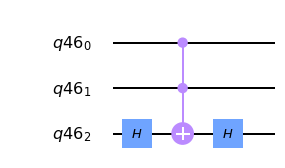

In [100]:
oracle_type=""
while len(oracle_type)!=3:
    oracle_type=str(input("Enter type of oracle: 000, thru 111\n>"))
    
print(len(oracle_type))
qr = QuantumRegister(3)
oracleCircuit = QuantumCircuit(qr)
phase_oracle(oracleCircuit, qr)
print("Oracle for: |", oracle_type,">")
display(oracleCircuit.draw(output="mpl"))


Enter number of iterations:
>1
Oracle for: | 111 >
Number of iterations: 1


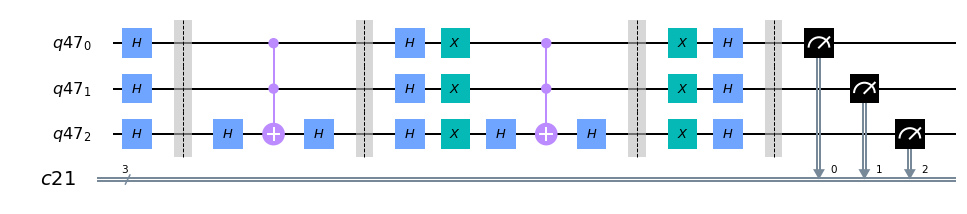

In [101]:
# Number of iterations
iterations=0
while iterations==0:
    iterations=int(input("Enter number of iterations:\n>"))

qr = QuantumRegister(3)
cr = ClassicalRegister(3)

groverCircuit = QuantumCircuit(qr,cr)
from math import pi
# initiate the Grover with Hadamards
groverCircuit.h(qr)
groverCircuit.barrier(qr)

for n in range(0, iterations):
    phase_oracle(groverCircuit, qr)
    inversion_circuit(groverCircuit,qr)
    groverCircuit.barrier(qr)

# add measurements
groverCircuit.measure(qr,cr)
print("Oracle for: |", oracle_type,">")
print("Number of iterations:",iterations)
groverCircuit.draw(output="mpl")


Oracle for: | 111 >
Number of iterations: 1


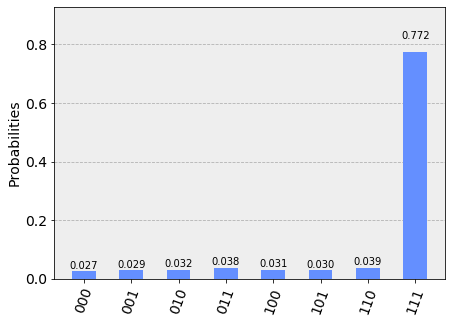

In [99]:
backend = BasicAer.get_backend('qasm_simulator')
shots = 1024
results = execute(groverCircuit, backend=backend, shots=shots).result()
answer = results.get_counts()
print("Oracle for: |", oracle_type,">")
print("Number of iterations:",iterations)
display(plot_histogram(answer))


# Qiskit Aqua Grover algorithm

In [13]:
# Do the necessary import for our program
from qiskit.aqua.algorithms import Grover
from qiskit.aqua.components.oracles import LogicalExpressionOracle, TruthTableOracle
from qiskit.compiler import transpile

In [14]:
oracle_method=str(input("Enter method for the oracle: Log (logical input) or Bit (truth table bit input)\n>"))

Enter method for the oracle: Log (logical input) or Bit (truth table bit input)
>Log


Oracle type: 101
Oracle method: Log


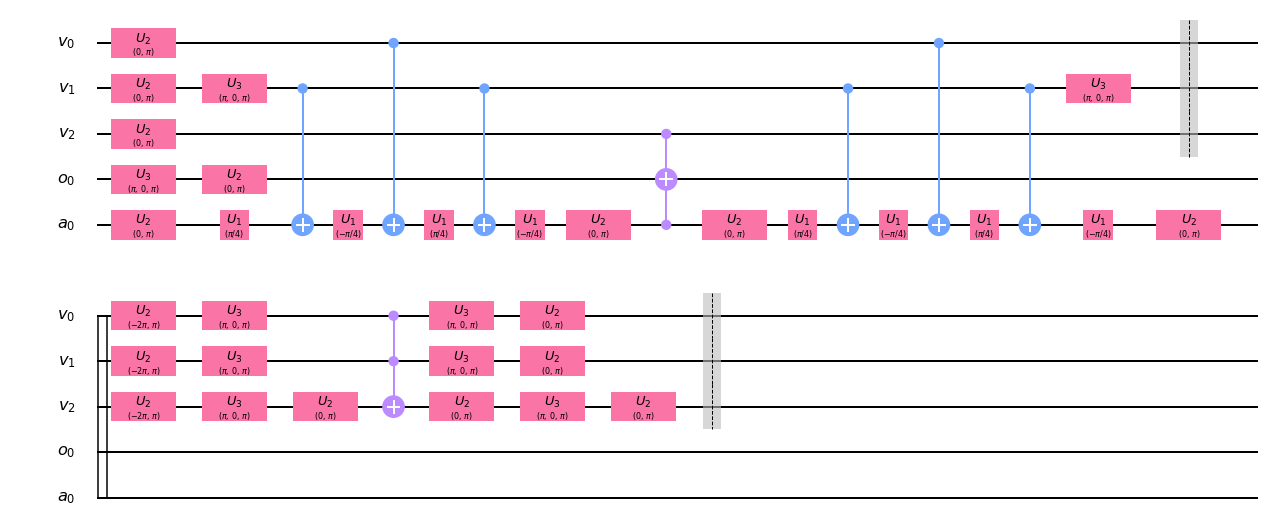

In [15]:
#oracle_method = "Bit" #<-"Log" or "Bit"
print("Oracle type:",oracle_type)
print("Oracle method:",oracle_method)


if oracle_type=="000111":   
    log_expr = '((~A & ~B & ~C) & (A & B & C))' #<- Oracle for |000> + |111>
    bitstr = '10000001'
elif oracle_type=="000":
    log_expr = '(~A & ~B & ~C)' #<- Oracle for |000>
    bitstr = '10000000'
elif oracle_type=="001":
    log_expr = '(A & ~B & ~C)' #<- Oracle for |001>
    bitstr = '01000000'  
elif oracle_type=="010":
    log_expr = '(~A & B & ~C)' #<- Oracle for |010>
    bitstr = '00100000'   
elif oracle_type=="011":
    log_expr = '(A & B & ~C)' #<- Oracle for |011>
    bitstr = '00010000'   
elif oracle_type=="100":
    log_expr = '(A & B & ~C)' #<- Oracle for |100>
    bitstr = '00001000' 
elif oracle_type=="101":
    log_expr = '(A & ~B & C)' #<- Oracle for |101>
    bitstr = '00000100' 
elif oracle_type=="110":
    log_expr = '(~A & B & C)' #<- Oracle for |110>
    bitstr = '00000010'    
elif oracle_type=="111":
    log_expr = '(A & B & C)' #<- Oracle for |111>
    bitstr = '00000001'

if oracle_method=="Log":
    algorithm = Grover(LogicalExpressionOracle(log_expr))
    circuit = Grover(LogicalExpressionOracle(log_expr)).construct_circuit()
else:
    algorithm = Grover(TruthTableOracle(bitstr))
    circuit = Grover(TruthTableOracle(bitstr)).construct_circuit()

circuit.draw(output="mpl")



Oracle for: | 101 >
Oracle method: Log
101


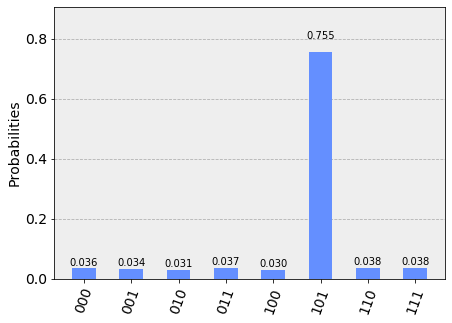

In [16]:
# Run the algorithm on a simulator, printing the most frequently occurring result
backend = BasicAer.get_backend('qasm_simulator')

result = algorithm.run(backend)
print("Oracle for: |", oracle_type,">")
print("Oracle method:",oracle_method)
print(result['top_measurement'])
plot_histogram(result['measurement'])

In [17]:
help(QuantumCircuit
    )

Help on class QuantumCircuit in module qiskit.circuit.quantumcircuit:

class QuantumCircuit(builtins.object)
 |  QuantumCircuit(*regs, name=None)
 |  
 |  Quantum circuit.
 |  
 |  Methods defined here:
 |  
 |  AND = logical_and(self, qr_variables, qb_target, qr_ancillae, flags=None, mct_mode='basic')
 |      Build a collective conjunction (AND) circuit in place using mct.
 |      
 |      Args:
 |          self (QuantumCircuit): The QuantumCircuit object to build the conjunction on.
 |          variable_register (QuantumRegister): The QuantumRegister holding the variable qubits.
 |          flags (list of int): A list of +1/-1/0 to mark negations or omissions of qubits.
 |          target_qubit (Qubit): The target qubit to hold the conjunction result.
 |          ancillary_register (QuantumRegister): The ancillary QuantumRegister for building the mct.
 |          mct_mode (str): The mct building mode.
 |  
 |  OR = logical_or(self, qr_variables, qb_target, qr_ancillae, flags=None, mc

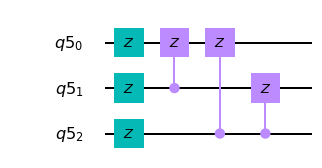

In [19]:
# 000 and 111

def phase_oracle(circuit, register):
    circuit.z(qr)
    circuit.cz(qr[1],qr[0])
    circuit.cz(qr[2],qr[0])
    circuit.cz(qr[2],qr[1])

qr = QuantumRegister(3)
oracleCircuit = QuantumCircuit(qr)
phase_oracle(oracleCircuit, qr)
oracleCircuit.draw(output="mpl")